## Intial analysis of water data collected in Alicante

In [1]:
import warnings
# warnings.filterwarnings('ignore')
import os
import sys
import math
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statistics import mean


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import water_monitoring

In [2]:
instance = water_monitoring.WaterMonitoringInstance()
instance.read_data("../data/Benalua Consumption/Benalua 2017.csv", ";")
instance.get_data_frame()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



,CA009-52,Unnamed: 1,CT005-52,Unnamed: 3,Unnamed: 4
0,31/12/2016 14:03:05,"52,40174",31/12/2016 14:15:00,"244664,04",NaN
1,31/12/2016 14:03:37,"52,47813",31/12/2016 14:30:00,"244677,95",NaN
2,31/12/2016 14:04:07,"53,81166",31/12/2016 14:45:00,"244692,39",NaN
3,31/12/2016 14:04:38,"58,46457",31/12/2016 15:00:00,"244708,2",NaN
4,31/12/2016 14:05:08,"53,33333",31/12/2016 15:15:00,"244724,06",NaN
...,...,...,...,...,...
1011603,31/12/2017 14:01:03,"93,18069",NaN,NaN,NaN
1011604,31/12/2017 14:01:34,"86,513",NaN,NaN,NaN
1011605,31/12/2017 14:02:04,"89,7308",NaN,NaN,NaN
1011606,31/12/2017 14:02:35,"93,27354",NaN,NaN,NaN


In [3]:
instance.transform_data("alicante", True)
instance.make_time_features("CA009-52")

data = instance.get_data_frame()
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CA009-52,Data-1(Sensor1),Minute,Hour,Day,Month,Year
0,2016-12-31 14:03:05,52.40174,3,14,31,12,2016
1,2016-12-31 14:03:37,52.47813,3,14,31,12,2016
2,2016-12-31 14:04:07,53.81166,4,14,31,12,2016
3,2016-12-31 14:04:38,58.46457,4,14,31,12,2016
4,2016-12-31 14:05:08,53.33333,5,14,31,12,2016
...,...,...,...,...,...,...,...
1011602,2017-12-31 14:00:32,97.48893,0,14,31,12,2017
1011603,2017-12-31 14:01:03,93.18069,1,14,31,12,2017
1011604,2017-12-31 14:01:34,86.51300,1,14,31,12,2017
1011605,2017-12-31 14:02:04,89.73080,2,14,31,12,2017


In [4]:
subset_data = instance.take_data_in_range("2017-05-13 10:30:00", "2017-07-13 10:30:00", "CA009-52")
subset_data

,CA009-52,Data-1(Sensor1),Minute,Hour,Day,Month,Year
367092,2017-05-13 10:30:31,85.67179,30,10,13,5,2017
367093,2017-05-13 10:31:02,90.00000,31,10,13,5,2017
367094,2017-05-13 10:31:33,94.92537,31,10,13,5,2017
367095,2017-05-13 10:32:03,88.32188,32,10,13,5,2017
367096,2017-05-13 10:32:35,95.81074,32,10,13,5,2017
...,...,...,...,...,...,...,...
536440,2017-07-13 10:27:48,81.77777,27,10,13,7,2017
536441,2017-07-13 10:28:20,79.29516,28,10,13,7,2017
536442,2017-07-13 10:28:51,76.36902,28,10,13,7,2017
536443,2017-07-13 10:29:22,85.79941,29,10,13,7,2017


In [5]:
coef_arr = instance.calculate_correlation("Data-1(Sensor1)")
# instance.get_nan_rows()
coef_arr 

Attribute CA009-52 can't be correlated. ufunc 'add' cannot use operands with types dtype('float64') and dtype('<M8[ns]')

Column with the most correlation is: Hour. Pearson coef: 0.3947


[('Year', -0.007195260552843003),
 ('Minute', 0.0007758037977557866),
 ('Day', 0.0054777198034757675),
 ('Month', 0.034162288553183304),
 ('Hour', 0.3947390479105434)]

In [6]:
analyzer = water_monitoring.Analyzer(subset_data)
y_test, y_pred, time = analyzer.random_forest(["Hour"], "Data-1(Sensor1)", "CA009-52")

Random forest regression R2:  0.430692010473005
MSE result: 433.3777401495922


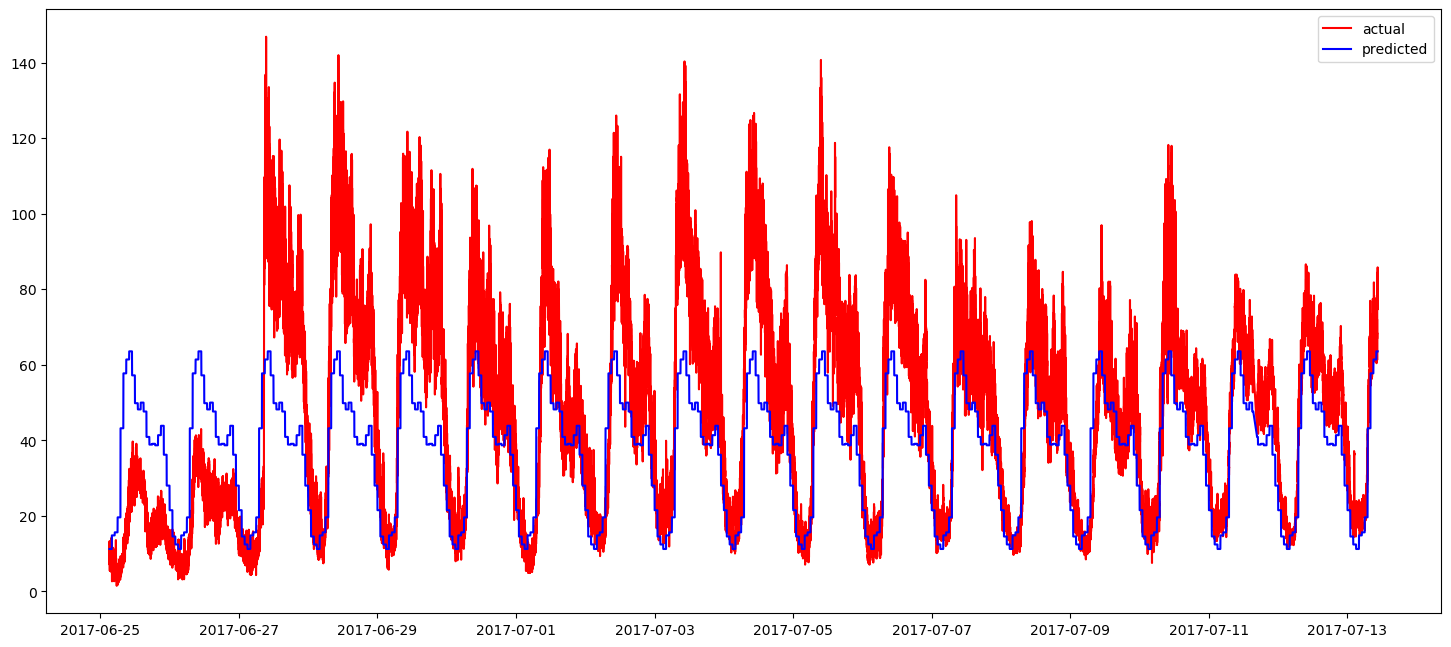

In [7]:
"""fig = px.line(data, x="CA009-52", y="Data-1(Sensor1)", height=600)
fig.show()""";
fig = plt.figure(figsize=(18, 8), dpi=100, facecolor='w')

plt.plot(time, y_test, color="red", label="actual")
plt.plot(time, y_pred, color="blue", label="predicted")

plt.legend()
plt.show()

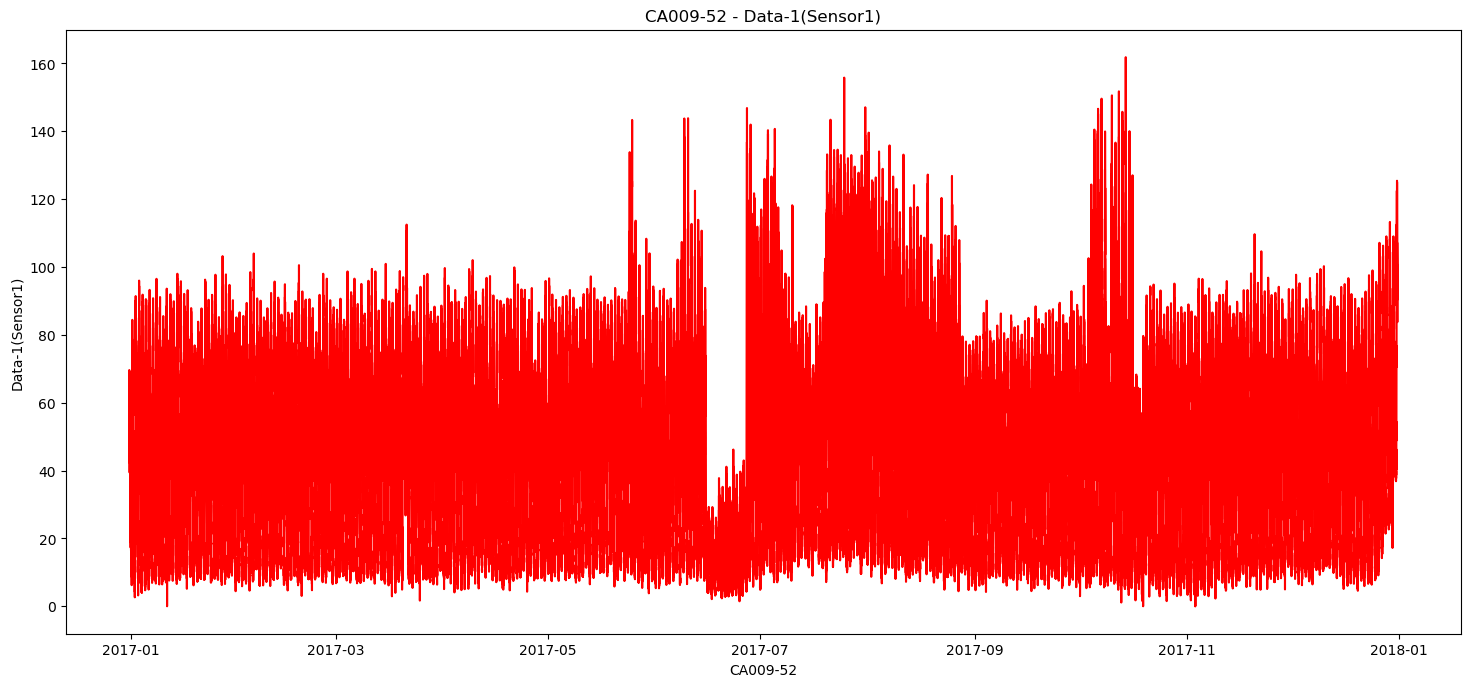

In [8]:
instance.plot_two_columns("CA009-52", "Data-1(Sensor1)")

In [9]:
# instance.interactive_two_columns_plot("CA009-52", "Data-1(Sensor1)")

In [10]:
instance_2 = water_monitoring.WaterMonitoringInstance()
instance_2.read_data("../data/water_loss_data_set_1.json", "json")
instance_2.get_data_frame()

,timeStamp,idflowmeter,tot1,tot2,analog2
0,2018-11-23 07:03:00,MAG8000_024905H318,0.00,0.00,0.00
1,2018-11-23 07:04:00,MAG8000_024905H318,0.00,0.00,0.00
2,2018-11-23 07:06:00,MAG8000_024905H318,0.00,0.00,0.00
3,2018-11-23 07:09:00,MAG8000_024905H318,0.00,0.00,0.00
4,2018-11-23 07:10:00,MAG8000_024905H318,0.00,0.00,0.00
...,...,...,...,...,...
1395740,2020-04-01 14:05:00,MAG8000_024805H318,977428.25,-4713.21,1.54
1395741,2020-04-01 14:06:00,MAG8000_024805H318,977428.88,-4713.21,1.54
1395742,2020-04-01 14:07:00,MAG8000_024805H318,977429.50,-4713.21,1.54
1395743,2020-04-01 14:08:00,MAG8000_024805H318,977430.12,-4713.21,1.54


In [11]:
instance_2.transform_data("braila", True)
data_2 = instance_2.get_data_frame()
data_2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timeStamp,idflowmeter,tot1,tot2,analog2
105,2018-11-23 08:55:00,MAG8000_024905H318,0.43,0.00,1.11
106,2018-11-23 08:56:00,MAG8000_024905H318,0.89,0.00,1.11
107,2018-11-23 08:57:00,MAG8000_024905H318,1.38,0.00,1.11
108,2018-11-23 08:58:00,MAG8000_024905H318,1.90,0.00,1.11
109,2018-11-23 08:59:00,MAG8000_024905H318,2.45,0.00,1.11
...,...,...,...,...,...
1395740,2020-04-01 14:05:00,MAG8000_024805H318,977428.25,-4713.21,1.54
1395741,2020-04-01 14:06:00,MAG8000_024805H318,977428.88,-4713.21,1.54
1395742,2020-04-01 14:07:00,MAG8000_024805H318,977429.50,-4713.21,1.54
1395743,2020-04-01 14:08:00,MAG8000_024805H318,977430.12,-4713.21,1.54
